# Project: Investigate a Dataset (No-show appointments !)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> the dataset provided contains information on 110.527 medical appointments each having 14 different variables ending with whether the patient showed up to the appointment or not.

>the provided variables are PatientId, AppointmentID, Gender, Scheduled Day, Appointment Day, Age, Neighbourhood, Scholarship, 	Hypertension, Diabetes, Alcoholism, Handcap, MS_received and No-show

> In this analysis I plan on exploring the following :(does gender affect the show rate?, which age groups have the highest show rate?, does having a scholarship coverage affects show rate? how much does having different comorbidities(hypertension, diabetes, alchoholist) affect show rate?, what's the distribution of show rate among different neighborhoods? 

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [80]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv', parse_dates=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [81]:
df.shape

(110527, 14)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [83]:
df.duplicated().sum()

0

In [84]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


>no null data,or duplicate rows great!

>Column names are in title format which is not ideal for analysis, 
>date columns are in string format instead of datetime, 
>no show column is in a confusing format that needs adjusting

>some of the age values appear to be negative

>the Patient and schedule id formats are misleading but I plan on dropping them as they are insignificant to my analysis

### Data Cleaning 
>First the column names:

In [85]:
df.columns = df.columns.str.strip().str.replace('-', '_').str.lower()

>checking the no-show counts:

In [86]:
df['no_show'].value_counts()

No     88208
Yes    22319
Name: no_show, dtype: int64

>fixing the no show column format & name

In [87]:
df.loc[df['no_show'] == 'No', 'no_show'] = 1
df.loc[df['no_show'] == 'Yes', 'no_show'] = 0
df.rename(columns={'no_show': 'show', 'hipertension': 'hypertension', 'handcap': 'handicap'}, inplace=True)
df['show'] = df['show'].astype('int64')
df['show'].value_counts()

1    88208
0    22319
Name: show, dtype: int64

>converting the date columns to proper format

In [88]:
df['scheduledday']= pd.to_datetime(df['scheduledday'])
df['appointmentday']= pd.to_datetime(df['appointmentday'])

>cheching negative age rows

In [89]:
drop = df.query('age < 0').index
df.iloc[drop]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,1


>dropping the negative age row

In [90]:
df.drop(index=drop, inplace=True)

>creating "comorbidities" column to list how many long-term diseases the patient has

In [91]:
comorbidities = df['hypertension'] +df['diabetes'] + df['alcoholism']
df['comorbidities'] = comorbidities

>dropping insignificant columns

In [92]:
df.drop(['patientid', 'appointmentid'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   gender          110526 non-null  object             
 1   scheduledday    110526 non-null  datetime64[ns, UTC]
 2   appointmentday  110526 non-null  datetime64[ns, UTC]
 3   age             110526 non-null  int64              
 4   neighbourhood   110526 non-null  object             
 5   scholarship     110526 non-null  int64              
 6   hypertension    110526 non-null  int64              
 7   diabetes        110526 non-null  int64              
 8   alcoholism      110526 non-null  int64              
 9   handicap        110526 non-null  int64              
 10  sms_received    110526 non-null  int64              
 11  show            110526 non-null  int64              
 12  comorbidities   110526 non-null  int64              
dtypes: datetime64[

<a id='eda'></a>
## Exploratory Data Analysis



### General statistics

In [93]:
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,comorbidities
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,0.798066,0.299513
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,0.401445,0.597657
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,3.000000


In [94]:
df.groupby(['show']).mean()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,comorbidities
show,,,,,,,,
0,34.317667,0.115507,0.169004,0.064071,0.030333,0.020297,0.438371,0.263408
1,37.790504,0.093904,0.204394,0.073838,0.030417,0.022742,0.291337,0.308649


>in general it seams the average age is around 37 , about 79.8% show to their appointments

### Research Question 1  (Gender effect on show rate?)

>number of males and females in the dataset

In [95]:
df['gender'].value_counts()

F    71839
M    38687
Name: gender, dtype: int64

>looks like female patients are much more than males in this dataset

>average age, scholarship coverage , sms-recieve rate by gender:

In [96]:
df.groupby(['gender']).mean()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,comorbidities
gender,,,,,,,,,
F,38.894542,0.123234,0.213519,0.078036,0.017024,0.019544,0.336892,0.796851,0.308579
M,33.736863,0.051904,0.167033,0.060408,0.055238,0.027270,0.291571,0.800321,0.282679


>visual representation of average show rate by gender 

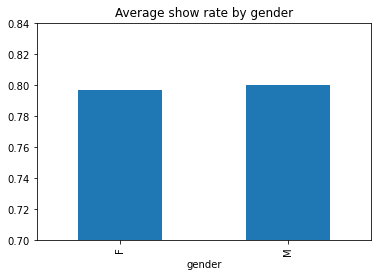

In [97]:
df.groupby(['gender']).mean()['show'].plot(kind= 'bar');
plt.ylim(bottom=0.7)
plt.title('Average show rate by gender');

### Research Question 2  (age effect on show rate?)
>visual representation of show rate by age groups

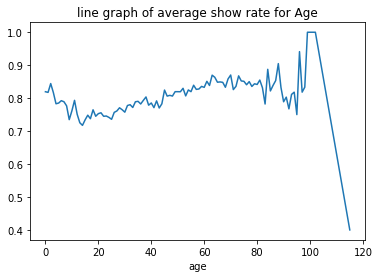

In [98]:
df.groupby(['age']).mean()['show'].plot(kind= 'line')
plt.title('line graph of average show rate for Age');

>looks like most age groups falls between an average of 70 to 85% show rate with a reducing trend around 20 years , 100% and 0% are seen above the 100yrs mark(possible outliers)

>exploring histogram of ages for show and no show:

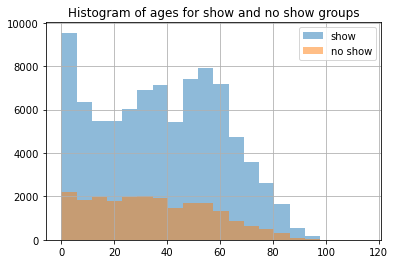

In [99]:
show = df['show'] == True
no_show = df['show'] == False
df.age[show].hist(alpha=0.5, bins=20, label='show')
df.age[no_show].hist(alpha=0.5, bins=20, label='no show')
plt.title('Histogram of ages for show and no show groups')
plt.legend();

>looks like both distributions are skewed to the right

>exploring distribution of ages for both groups:

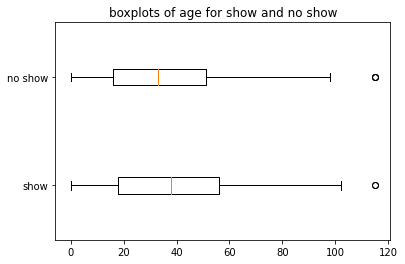

In [100]:
shows = df.query('show == 1')
no_shows = df.query('show == 0')
plt.boxplot([shows['age'], no_shows['age']], vert=False, labels=['show', 'no show'])
plt.title('boxplots of age for show and no show');

>seems both groups have a significant number of outlies in high ages 

>exploring outliers:

In [101]:
mean_for_age = df.groupby(['age']).mean()
print(mean_for_age['show'].min())
mean_for_age.query('show == 0.4')

0.4


,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,comorbidities
age,,,,,,,,
115,0.0,0.2,0.0,0.0,0.8,0.2,0.4,0.2


In [102]:
print(mean_for_age['show'].max())
mean_for_age.query('show == 1.0')

1.0


,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,comorbidities
age,,,,,,,,
99,0.0,1.0,1.0,0.0,0.0,0.00,1.0,2.0
100,0.0,0.0,0.0,0.0,0.5,0.25,1.0,0.0
102,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0


### Research Question 3  (scholarship coverage effect on show rate?)


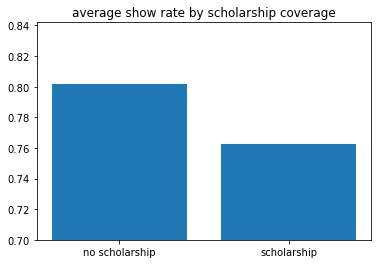

In [103]:
mean_schl= df.groupby(['scholarship']).mean()['show']
plt.bar(x=['no scholarship', 'scholarship'], height=mean_schl)
plt.ylim(bottom=0.7)
plt.title('average show rate by scholarship coverage');

>it looks like ther's a negative correlation between scholarship and show rates 

### Research Question 4  (sms_recieved effect on show rate?)


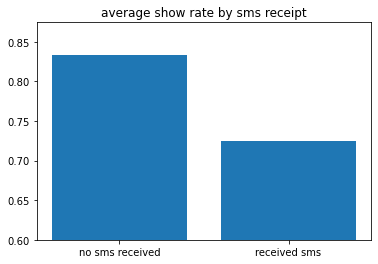

In [104]:
df.groupby(['sms_received']).mean()
mean_sms= df.groupby(['sms_received']).mean()['show']
plt.bar(x=['no sms received', 'received sms'], height=mean_sms)
plt.ylim(bottom=0.6)
plt.title('average show rate by sms receipt');

>it seems like the average show rate among those who didn't receive an sms is higher than those who did !

### Research Question 5  (effects of comorbidities on show rate?)


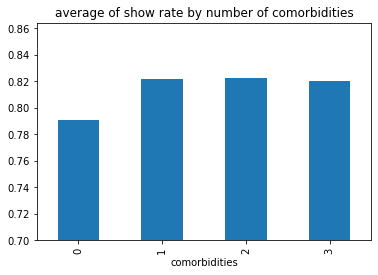

In [105]:
df.groupby(['comorbidities']).mean()['show'].plot(kind= 'bar')
plt.ylim(bottom=0.7)
plt.title('average of show rate by number of comorbidities');

>looks like show rate is lowest among those with no other long term diseases , lets explore the gender differences in these variables:

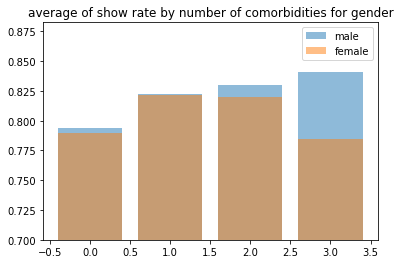

In [106]:
male = df[df['gender'] == 'M']
female = df[df['gender'] == 'F']
male_comorbid = male.groupby(['comorbidities']).mean()['show']
female_comorbid = female.groupby(['comorbidities']).mean()['show']
plt.bar([0, 1, 2, 3], male_comorbid, alpha=0.5, label='male')
plt.bar([0, 1, 2, 3], female_comorbid, alpha=0.5, label='female')
plt.ylim(bottom=0.7)
plt.legend()
plt.title('average of show rate by number of comorbidities for gender');

>oh, females with more than 2 long term diseases exhibit lower rates of showing up to appointments compared to males

### Research Question 6  (effects of handicap on show rate?)


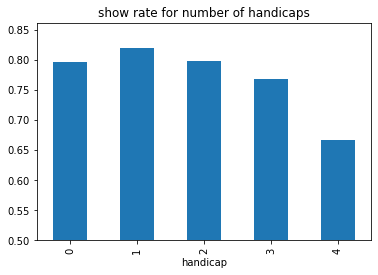

In [107]:
df.groupby(['handicap']).mean()['show'].plot(kind= 'bar')
plt.ylim(bottom=0.5)
plt.title('show rate for number of handicaps');

>lower average show rates for people with 2 or more handicaps

### Research Question 6  (show rate among different neighbourhoods?)


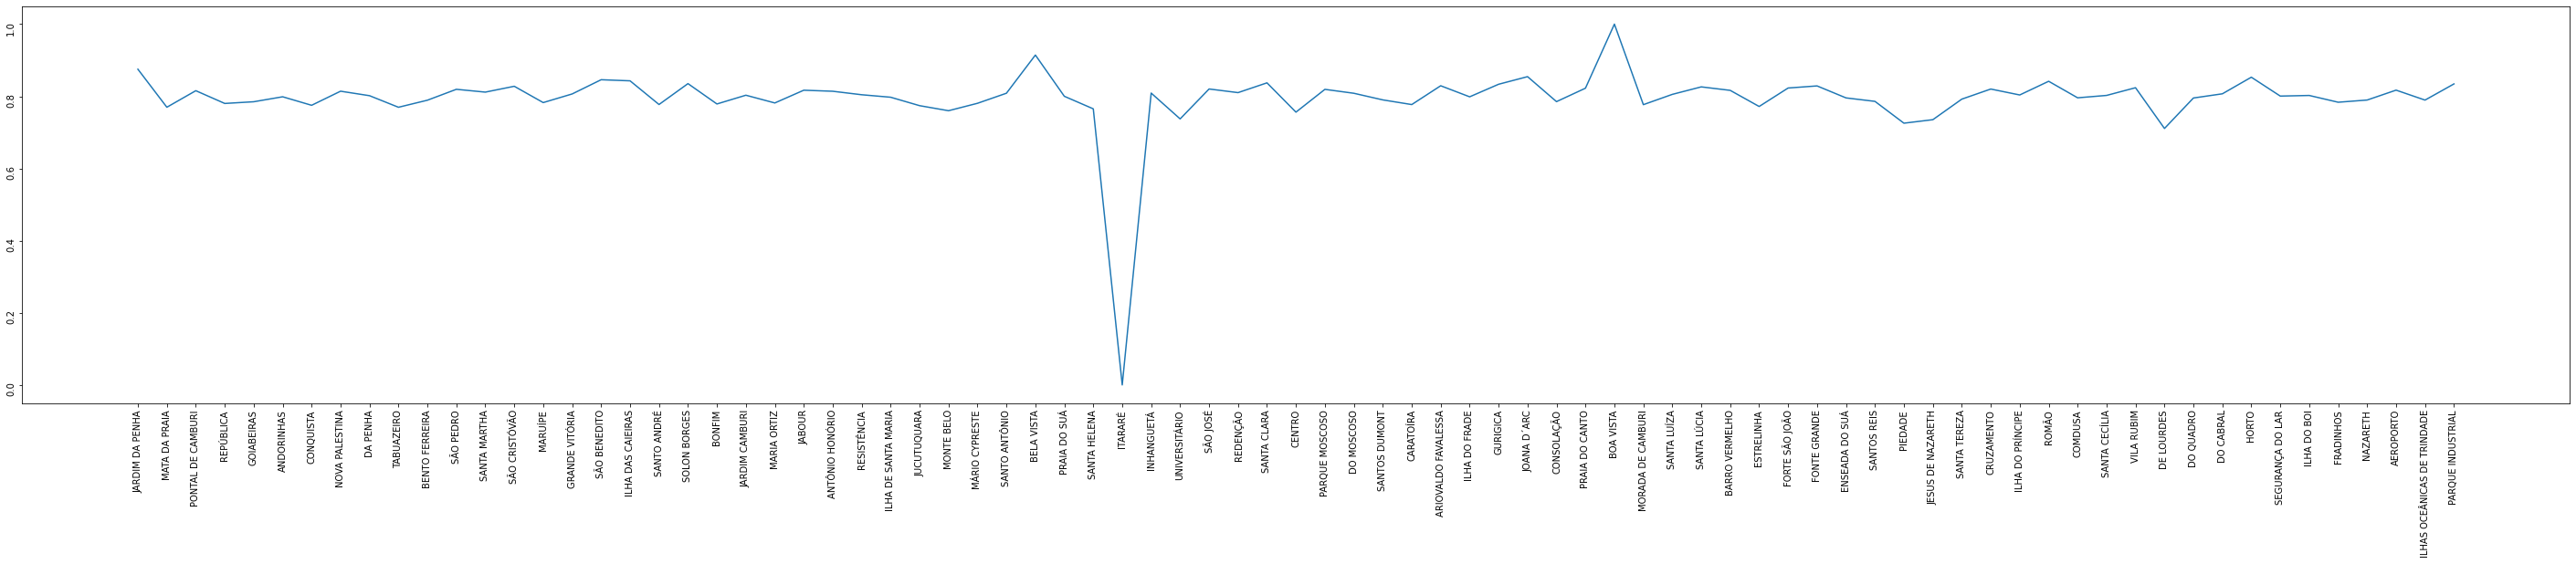

In [108]:
x = df['neighbourhood'].unique()
y = df.groupby(['neighbourhood']).mean()['show']
plt.figure(figsize=(50, 8))
plt.plot(x, y)
plt.tick_params(rotation= 90)
plt.autoscale();

>most of the neighborhoods follow the general mean with one outliers at 0% show , and at 100% show

<a id='conclusions'></a>
## Conclusions

> the average show rate is 79.8% , it's slightly higher in males 80.0% combared to females 79.6% , when filtered by age it shows right skew with lower numbers generally around the 20s (except for outliers), shcolarship coverage showed less show rate than non-covered, and lower rates among those who recieved SMSs, there was higher show rates in groups with more comorbidities , though these groups showed less numbers mong females when filtered by gender, people with more than 2 handicaps showed less show rate . most of the neighbourhoods had show rates around the average except for a couple of outliers.

> all of the results show correlations of data , no evidence of causation was given . this review is limited by the power of descriptive statistics as no inferential statistics was used, it's also limited by the scope of the given data, which lacks information as(if repeat appointments are for the same or different issues?)